# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

import time

filename_features = "UCI HAR Dataset/features.txt"
filename_labels = "UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "UCI HAR Dataset/train/y_train.txt"

filename_subtest = "UCI HAR Dataset/test/subject_test.txt"
filename_xtest = "UCI HAR Dataset/test/X_test.txt"
filename_ytest = "UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")
labels = pd.read_csv(filename_labels, sep=r'\s+', header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])
X_train = pd.read_csv(filename_xtrain, sep=r'\s+', header=None, names=features['nome_var'].tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])
X_test = pd.read_csv(filename_xtest, sep=r'\s+', header=None, names=features['nome_var'].tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [2]:
%%time
# Análise de PCA
n_componentes = X_train.shape[1]
pca = PCA(n_components = n_componentes).fit(X_train)

pca_tr = pca.transform(X_train)
pca_tt = pca.transform(X_test)

print("Formato do novo treino: ", pca_tr.shape)
print("Formato do novo teste: ", pca_tt.shape)

Formato do novo treino:  (7352, 561)
Formato do novo teste:  (2947, 561)
CPU times: total: 1.06 s
Wall time: 182 ms


In [2]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 391 ms
Wall time: 371 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [4]:
%%time
# Análise de PCA para base padronizada
n_componentes_pad = X_train_pad.shape[1]
pca_pad = PCA(n_components = n_componentes_pad).fit(X_train_pad)

pca_tr_pad = pca_pad.transform(X_train_pad)
pca_tt_pad = pca_pad.transform(X_test)

print("Formato do novo treino: ", pca_tr_pad.shape)
print("Formato do novo teste: ", pca_tt_pad.shape)

Formato do novo treino:  (7352, 561)
Formato do novo teste:  (2947, 561)
CPU times: total: 703 ms
Wall time: 177 ms


In [5]:
def variaveis(princomp, ncomp_criterio):
    
    variancia               = princomp.explained_variance_[ncomp_criterio-1]
    variancia_acumulada     = princomp.explained_variance_.cumsum()[ncomp_criterio-1]
    pct_variancia           = princomp.explained_variance_ratio_[ncomp_criterio-1]
    pct_variancia_acumulada = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio-1]

    print(f'Número de componentes:............... {ncomp_criterio}')
    print(f'Variância da ultima CP:.............. {variancia:.2f}' )
    print(f'Variância total explicada:........... {variancia_acumulada:.2f}' )
    print(f'Variância percentual da última CP:... {100*pct_variancia:.2f}%' )
    print(f'Variância percentual total explicada: {100*pct_variancia_acumulada:.2f}%' )
    
    return variancia, variancia_acumulada, pct_variancia, pct_variancia_acumulada

In [6]:
def plotar(ax, cor, ncomp_criterio, princomp):

    # Linhas verticais de referência
    ax[0,0].axvline(x = ncomp_criterio, color = cor, linestyle = '-', linewidth=.5)
    ax[1,1].axvline(x = ncomp_criterio, color = cor, linestyle = '-', linewidth=.5)
    ax[1,0].axvline(x = ncomp_criterio, color = cor, linestyle = '-', linewidth=.5)
    ax[0,1].axvline(x = ncomp_criterio, color = cor, linestyle = '-', linewidth=.5)
    
    # Variaveis    
    variancia, variancia_acumulada, pct_variancia, pct_variancia_acumulada = variaveis(princomp, ncomp_criterio)
    
    ax[0,0].axhline(y = variancia              , color = cor, linestyle = '-', linewidth=.5)
    ax[1,0].axhline(y = variancia_acumulada    , color = cor, linestyle = '-', linewidth=.5)
    ax[0,1].axhline(y = pct_variancia          , color = cor, linestyle = '-', linewidth=.5)
    ax[1,1].axhline(y = pct_variancia_acumulada, color = cor, linestyle = '-', linewidth=.5)
    

In [7]:
def graficos(princomp):

    print("Exibindo o scree plot da variância total")
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))  
    num_componentes = np.arange(princomp.n_components_) + 1
    ax.plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)  # Usar ax diretamente
    ax.set_title('Scree Plot - Variância total')
    ax.set_xlabel('Número de componentes')
    ax.set_ylabel('Variância explicada (Autovalores)')
    plt.show()
    plt.close()

    # Gráficos com os critérios
    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(20, 10))
    plt.subplots_adjust(hspace=0, wspace=.15)
    
    #Gráfico da variância nominal por qtd-componentes
    num_componentes = np.arange(princomp.n_components_) + 1
    ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
    ax[0,0].set_title('Scree Plot - Variância total')
    ax[0,0].set_xlabel('Número de componentes')
    ax[0,0].set_ylabel('Variancia explicada (Autovalores)')
    
    #Gráfico da variância nominal acumulada por qtd_componentes
    ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
    ax[1,0].set_xlabel('Número de componentes')
    ax[1,0].set_ylabel('Variancia explicada (Acumulada)')
    
    # Gráfico da variância percentual por qtd_componentes
    ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
    ax[0,1].set_title('Scree Plot - Variância percentual')
    ax[0,1].set_xlabel('Número de componentes')
    ax[0,1].set_ylabel('Variancia explicada (percentual)')
    
    # Gráfico da variância percentual acumulada por qtd_componentes
    ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
    ax[1,1].set_xlabel('Número de componentes')
    ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')
    
    # Critério 1: autovalor padronizado > 1
    ncomp_criterio1 = (princomp.explained_variance_ratio_>1/princomp.n_components_).sum()  
    print("Critério 1: autovalor padronizado > 1")
    plotar(ax, 'r', ncomp_criterio1, princomp)

    # Critério 2: Método do "cotovelo"
    while True:
        try:
            ncomp_criterio2 = int(input("Qual o valor do cotovelo?"))
            
            if 1 <= ncomp_criterio2 <= princomp.n_components_:
                break
            else:
                print(f"Por favor, insira um valor entre 1 e {princomp.n_components_}.")
        except ValueError:
            print("Por favor, insira um número inteiro válido.")
    print("Critério 2: Método do \"cotovelo\"")
    plotar(ax, 'g', ncomp_criterio2, princomp)

    
    # Critério 3: % variância explicada
    varexplicada = .95
    ncomp_criterio3 = (princomp.explained_variance_ratio_.cumsum() < varexplicada).sum() + 1
    # Garantir que ncomp_criterio não exceda o número de componentes
    ncomp_criterio3 = min(ncomp_criterio3, princomp.n_components_)
    print("Critério 3: % variância explicada")
    plotar(ax, 'c', ncomp_criterio3, princomp)

    
    for i in range(2):
        for j in range(2):
            ax[i,j].plot([], [], color='r', label='Critério 1')
            ax[i,j].plot([], [], color='g', label='Critério 2')
            ax[i,j].plot([], [], color='c', label='Critério 3')
            ax[i,j].legend()
    plt.show()

Análise PCA 1
Exibindo o scree plot da variância total


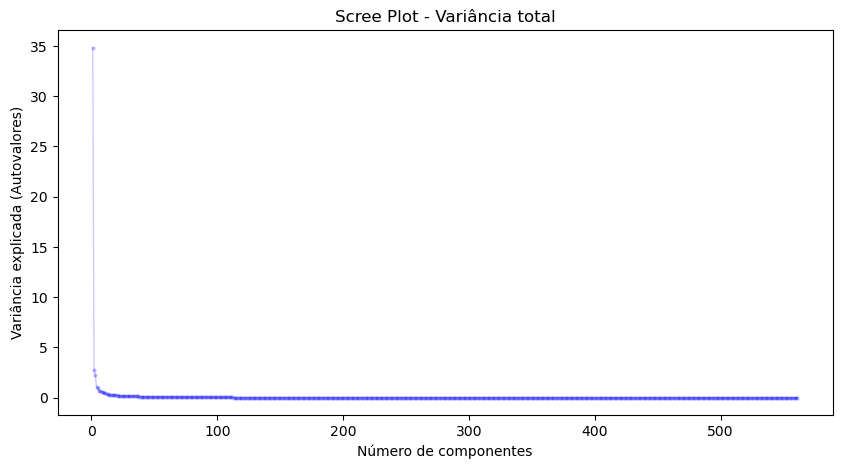

Critério 1: autovalor padronizado > 1
Número de componentes:............... 44
Variância da ultima CP:.............. 0.10
Variância total explicada:........... 51.29
Variância percentual da última CP:... 0.18%
Variância percentual total explicada: 92.14%


Qual o valor do cotovelo? 20


Critério 2: Método do "cotovelo"
Número de componentes:............... 20
Variância da ultima CP:.............. 0.23
Variância total explicada:........... 47.76
Variância percentual da última CP:... 0.41%
Variância percentual total explicada: 85.78%
Critério 3: % variância explicada
Número de componentes:............... 67
Variância da ultima CP:.............. 0.05
Variância total explicada:........... 52.91
Variância percentual da última CP:... 0.10%
Variância percentual total explicada: 95.05%


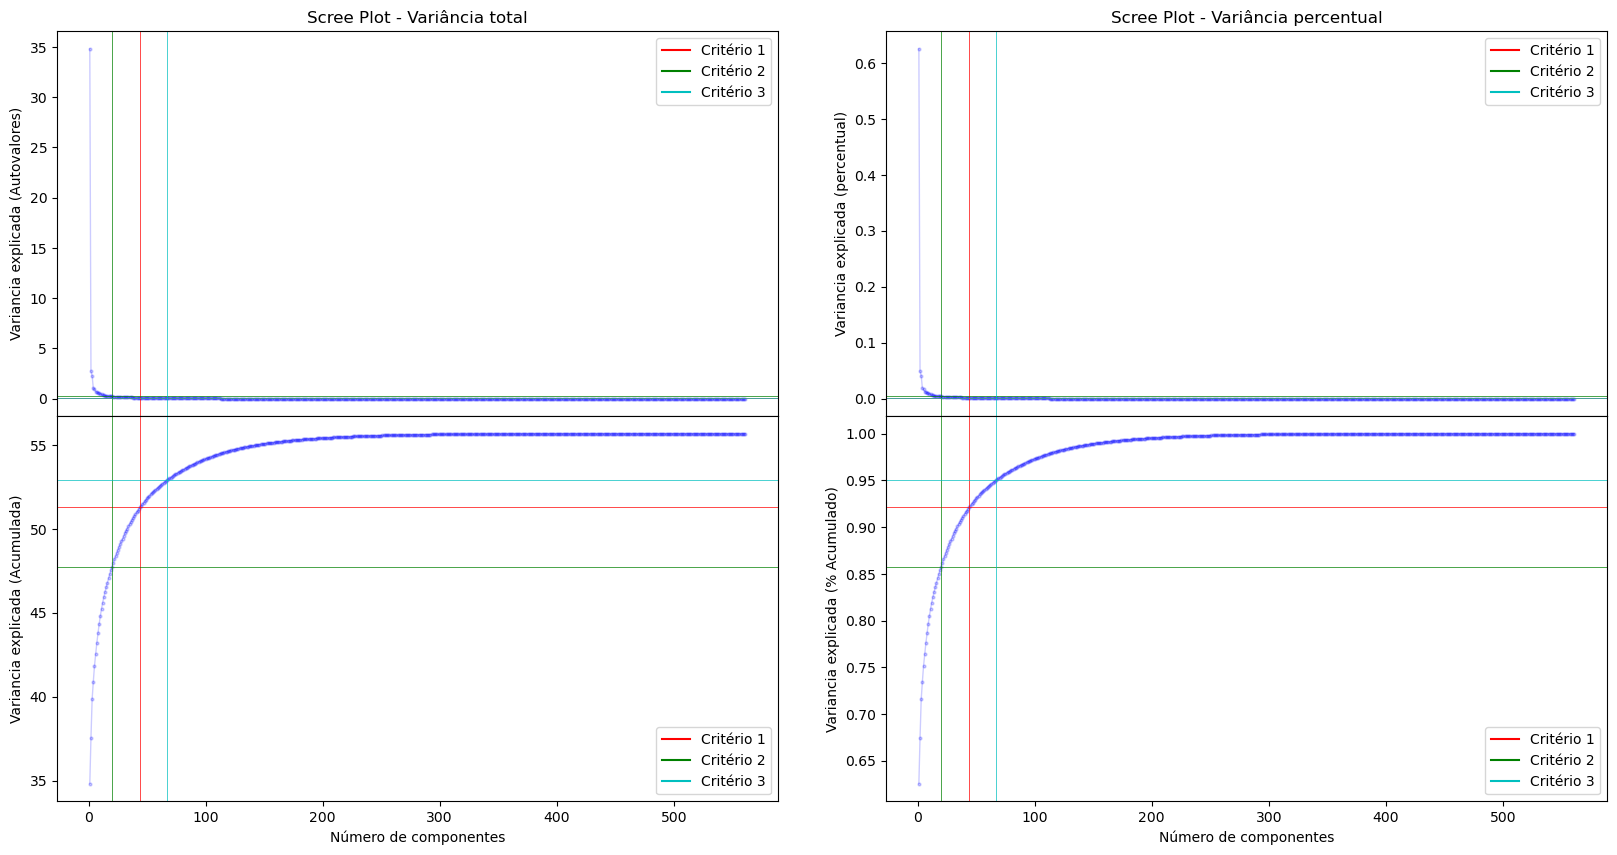

In [8]:
print("Análise PCA 1")
graficos(pca)

Análise PCA 2
Exibindo o scree plot da variância total


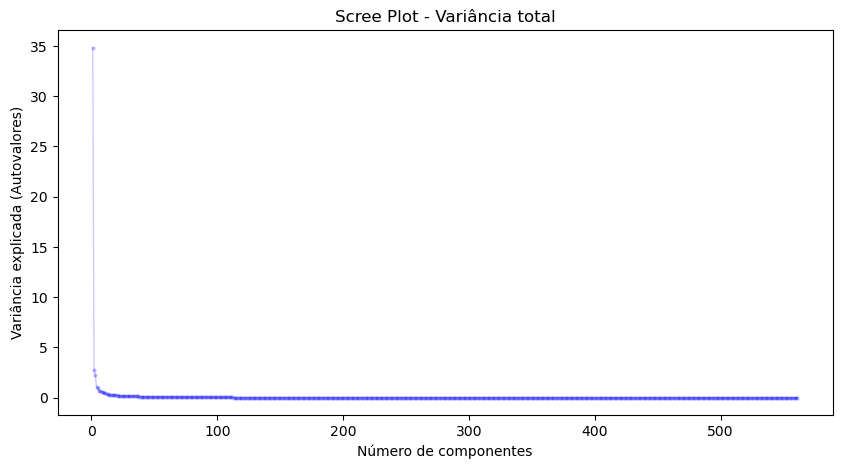

Critério 1: autovalor padronizado > 1
Número de componentes:............... 44
Variância da ultima CP:.............. 0.10
Variância total explicada:........... 51.29
Variância percentual da última CP:... 0.18%
Variância percentual total explicada: 92.14%


Qual o valor do cotovelo? 15


Critério 2: Método do "cotovelo"
Número de componentes:............... 15
Variância da ultima CP:.............. 0.28
Variância total explicada:........... 46.53
Variância percentual da última CP:... 0.50%
Variância percentual total explicada: 83.57%
Critério 3: % variância explicada
Número de componentes:............... 67
Variância da ultima CP:.............. 0.05
Variância total explicada:........... 52.91
Variância percentual da última CP:... 0.10%
Variância percentual total explicada: 95.05%


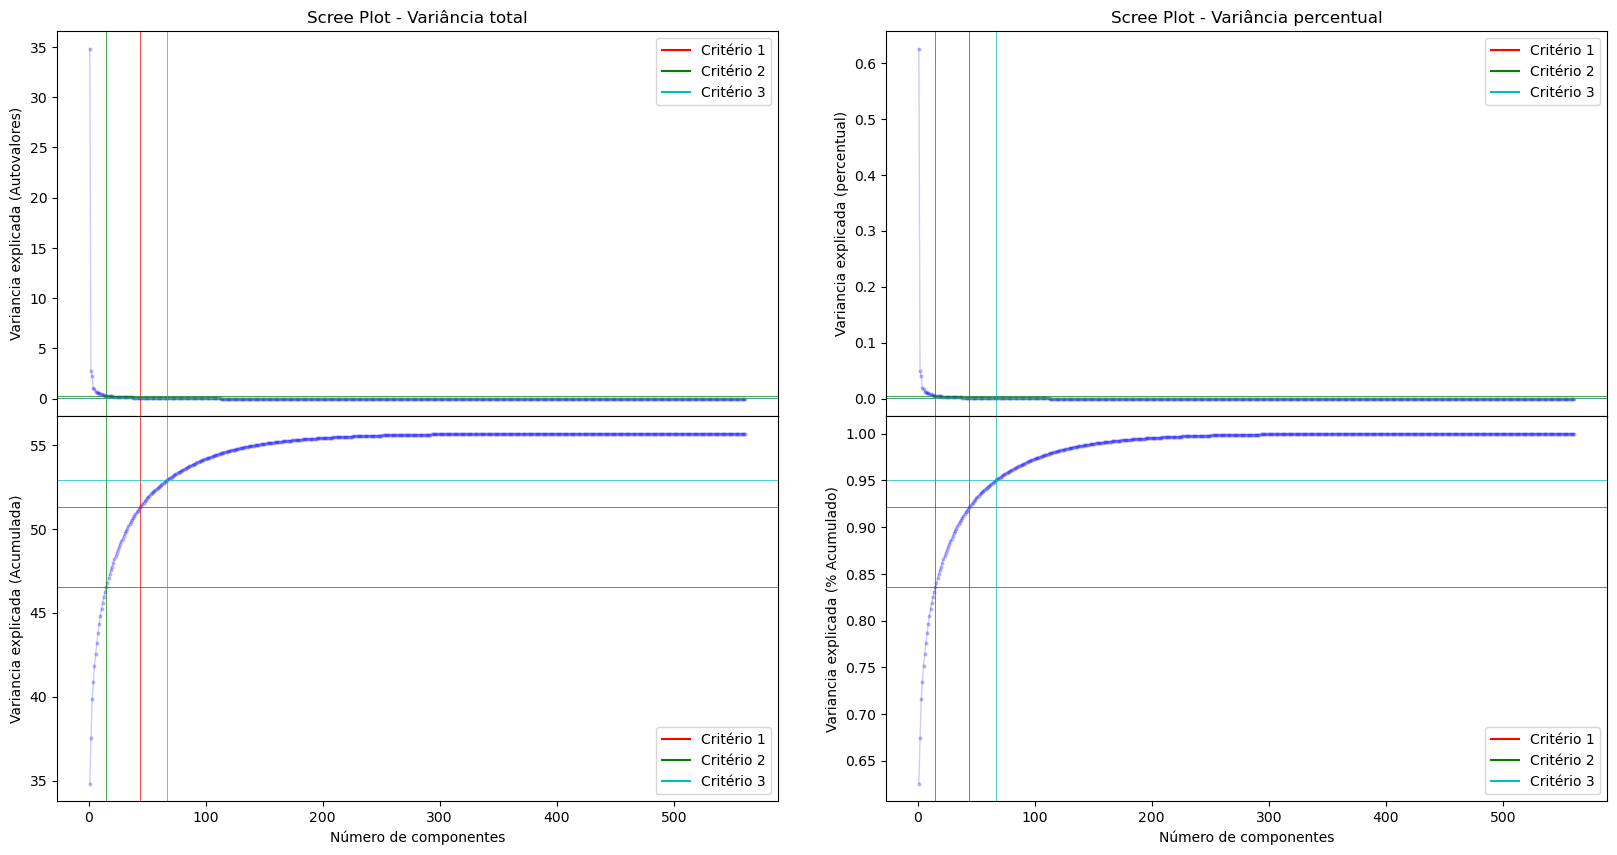

In [9]:
print("Análise PCA 2")
graficos(pca)

Análise PCA 3
Exibindo o scree plot da variância total


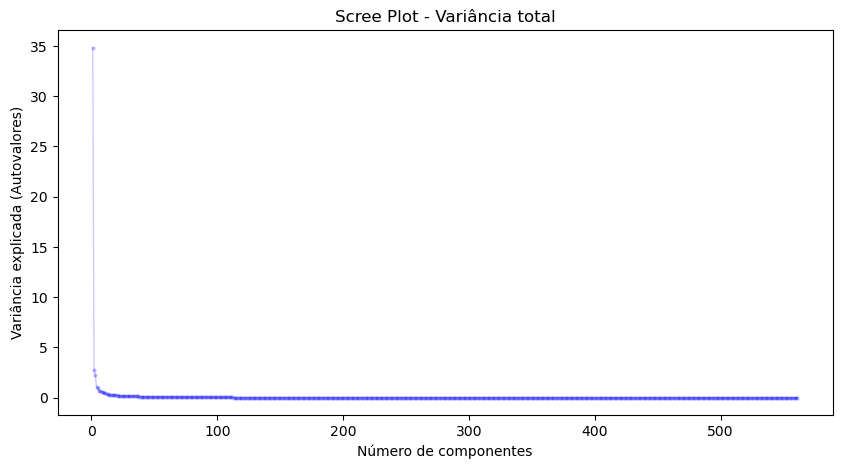

Critério 1: autovalor padronizado > 1
Número de componentes:............... 44
Variância da ultima CP:.............. 0.10
Variância total explicada:........... 51.29
Variância percentual da última CP:... 0.18%
Variância percentual total explicada: 92.14%


Qual o valor do cotovelo? 25


Critério 2: Método do "cotovelo"
Número de componentes:............... 25
Variância da ultima CP:.............. 0.18
Variância total explicada:........... 48.75
Variância percentual da última CP:... 0.33%
Variância percentual total explicada: 87.58%
Critério 3: % variância explicada
Número de componentes:............... 67
Variância da ultima CP:.............. 0.05
Variância total explicada:........... 52.91
Variância percentual da última CP:... 0.10%
Variância percentual total explicada: 95.05%


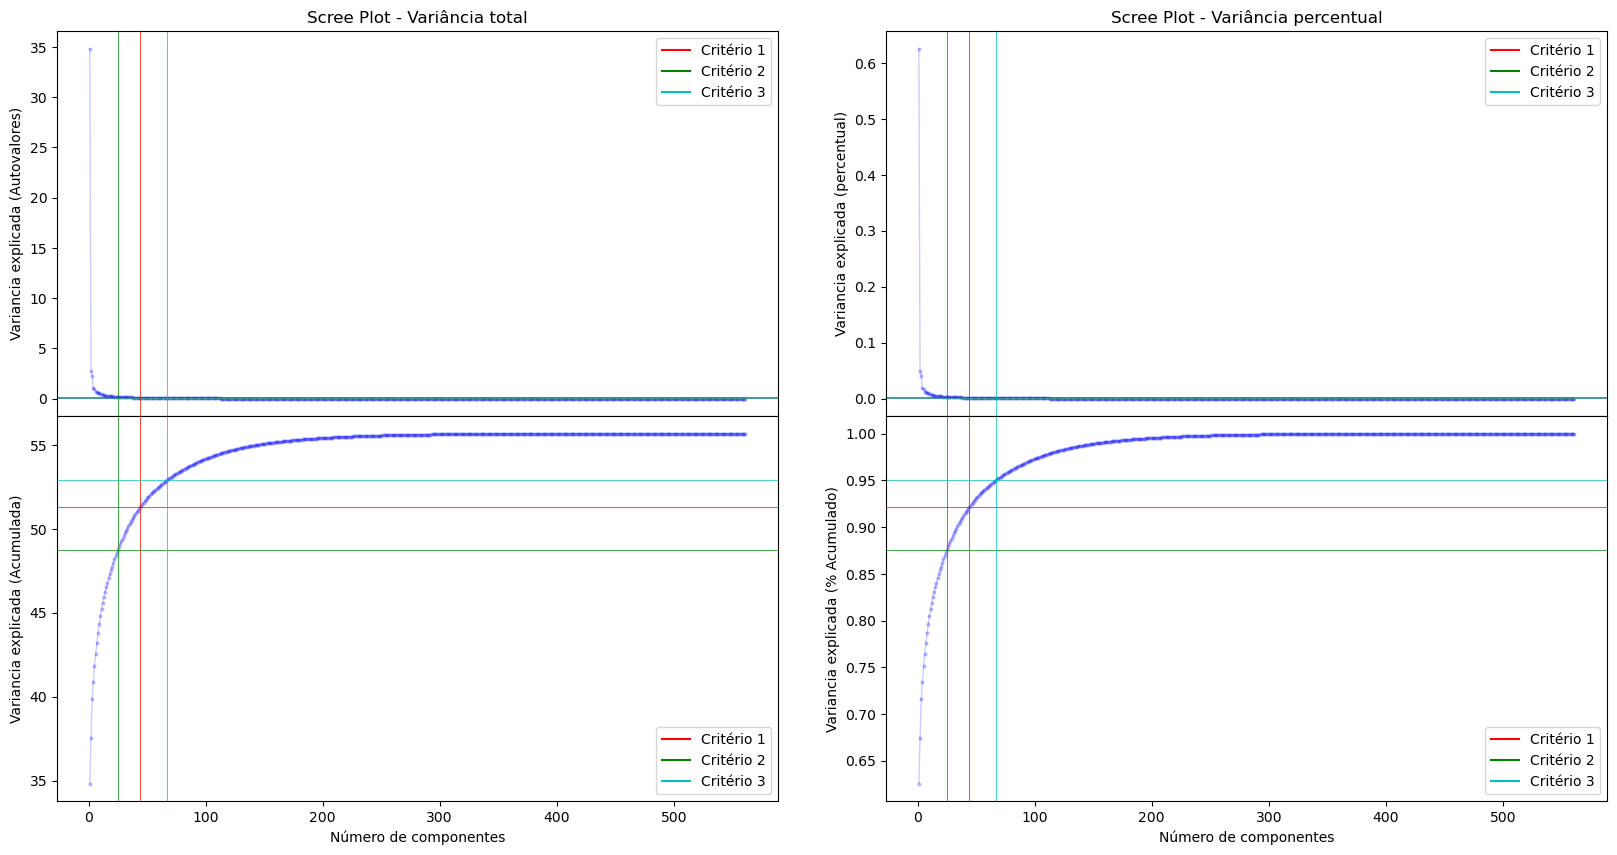

In [10]:
print("Análise PCA 3")
graficos(pca)

Observando os gráficos obtidos com os testes anteriores utilizando a base em PCA sem padronização dos dados, percebe-se que o valor de variância mais próximo de 90% é o primeiro critário "autovalor padronizado" com 44 componentes, com valor igual a 92,14%.

Análise PCA Padronizado 1
Exibindo o scree plot da variância total


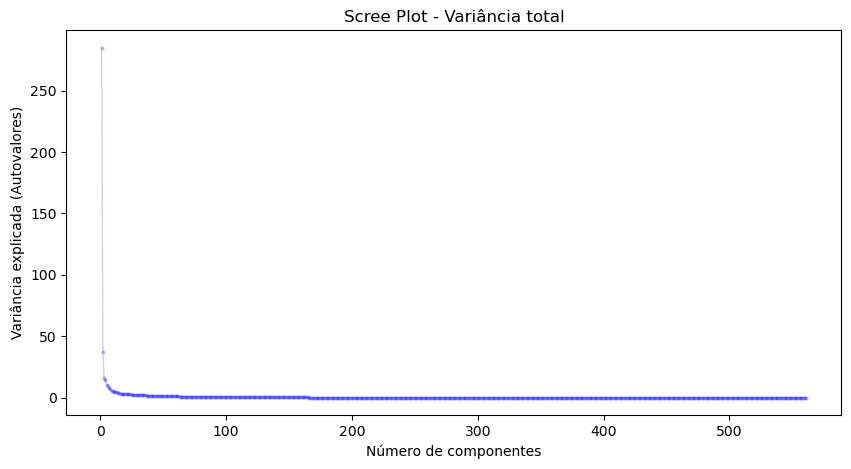

Critério 1: autovalor padronizado > 1
Número de componentes:............... 61
Variância da ultima CP:.............. 1.02
Variância total explicada:........... 503.22
Variância percentual da última CP:... 0.18%
Variância percentual total explicada: 89.70%


Qual o valor do cotovelo? 20


Critério 2: Método do "cotovelo"
Número de componentes:............... 20
Variância da ultima CP:.............. 2.96
Variância total explicada:........... 434.07
Variância percentual da última CP:... 0.53%
Variância percentual total explicada: 77.37%
Critério 3: % variância explicada
Número de componentes:............... 102
Variância da ultima CP:.............. 0.51
Variância total explicada:........... 533.37
Variância percentual da última CP:... 0.09%
Variância percentual total explicada: 95.08%


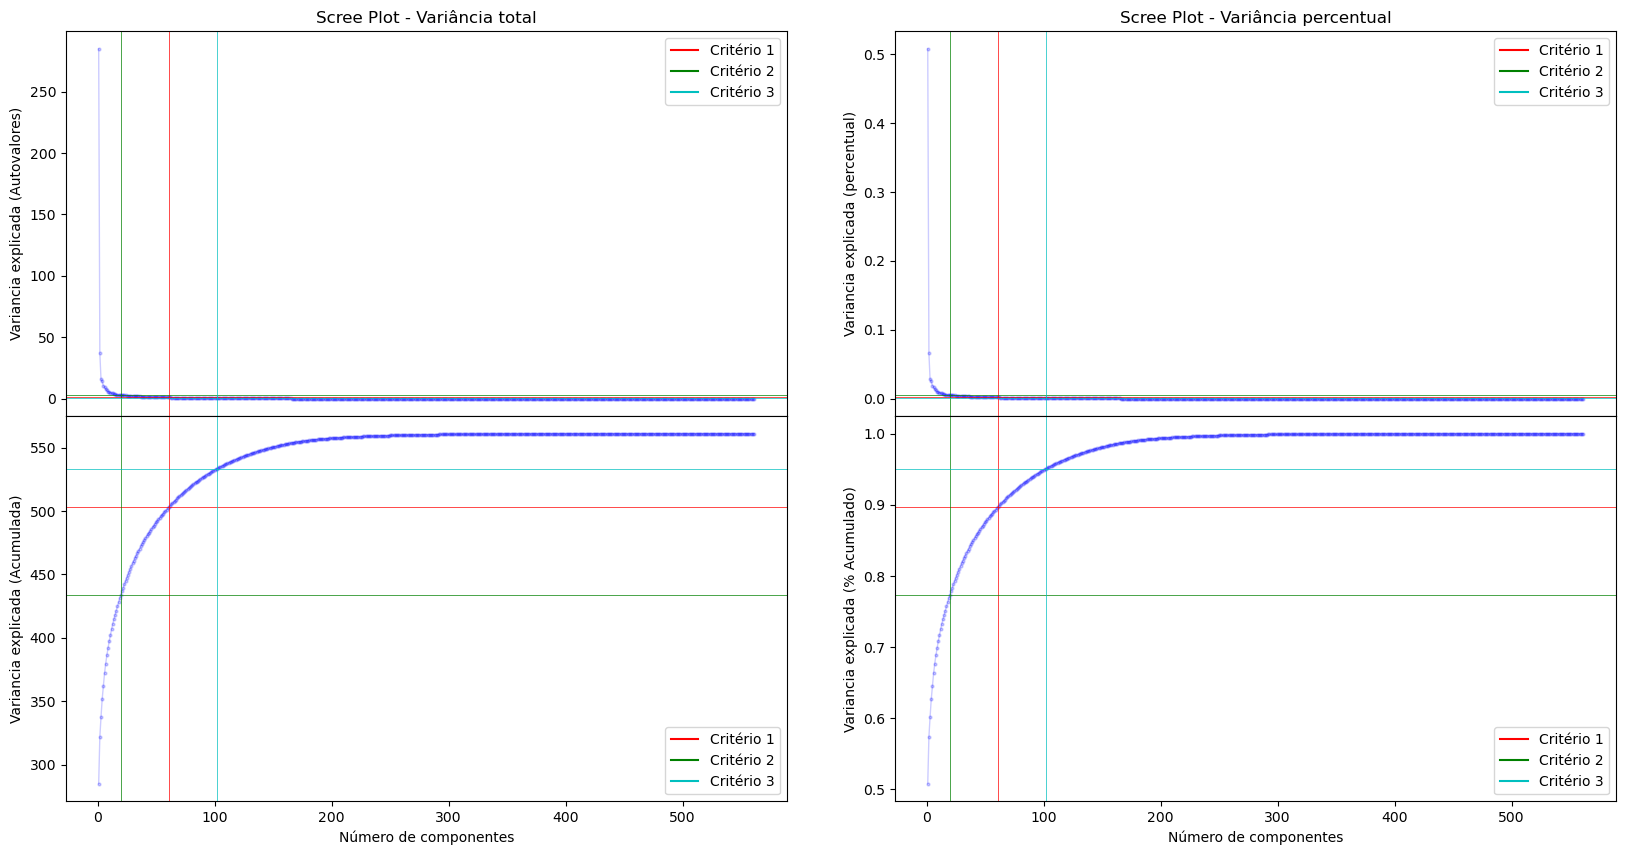

In [11]:
print("Análise PCA Padronizado 1")
graficos(pca_pad)

Análise PCA Padronizado 2
Exibindo o scree plot da variância total


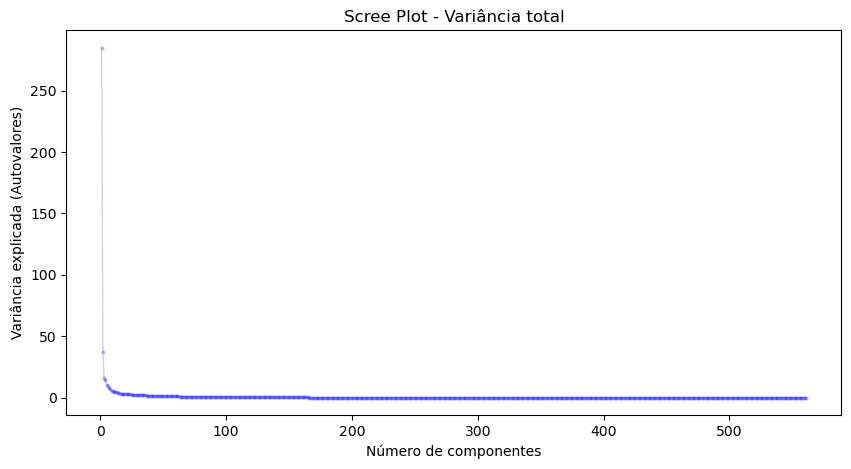

Critério 1: autovalor padronizado > 1
Número de componentes:............... 61
Variância da ultima CP:.............. 1.02
Variância total explicada:........... 503.22
Variância percentual da última CP:... 0.18%
Variância percentual total explicada: 89.70%


Qual o valor do cotovelo? 17


Critério 2: Método do "cotovelo"
Número de componentes:............... 17
Variância da ultima CP:.............. 3.29
Variância total explicada:........... 424.70
Variância percentual da última CP:... 0.59%
Variância percentual total explicada: 75.70%
Critério 3: % variância explicada
Número de componentes:............... 102
Variância da ultima CP:.............. 0.51
Variância total explicada:........... 533.37
Variância percentual da última CP:... 0.09%
Variância percentual total explicada: 95.08%


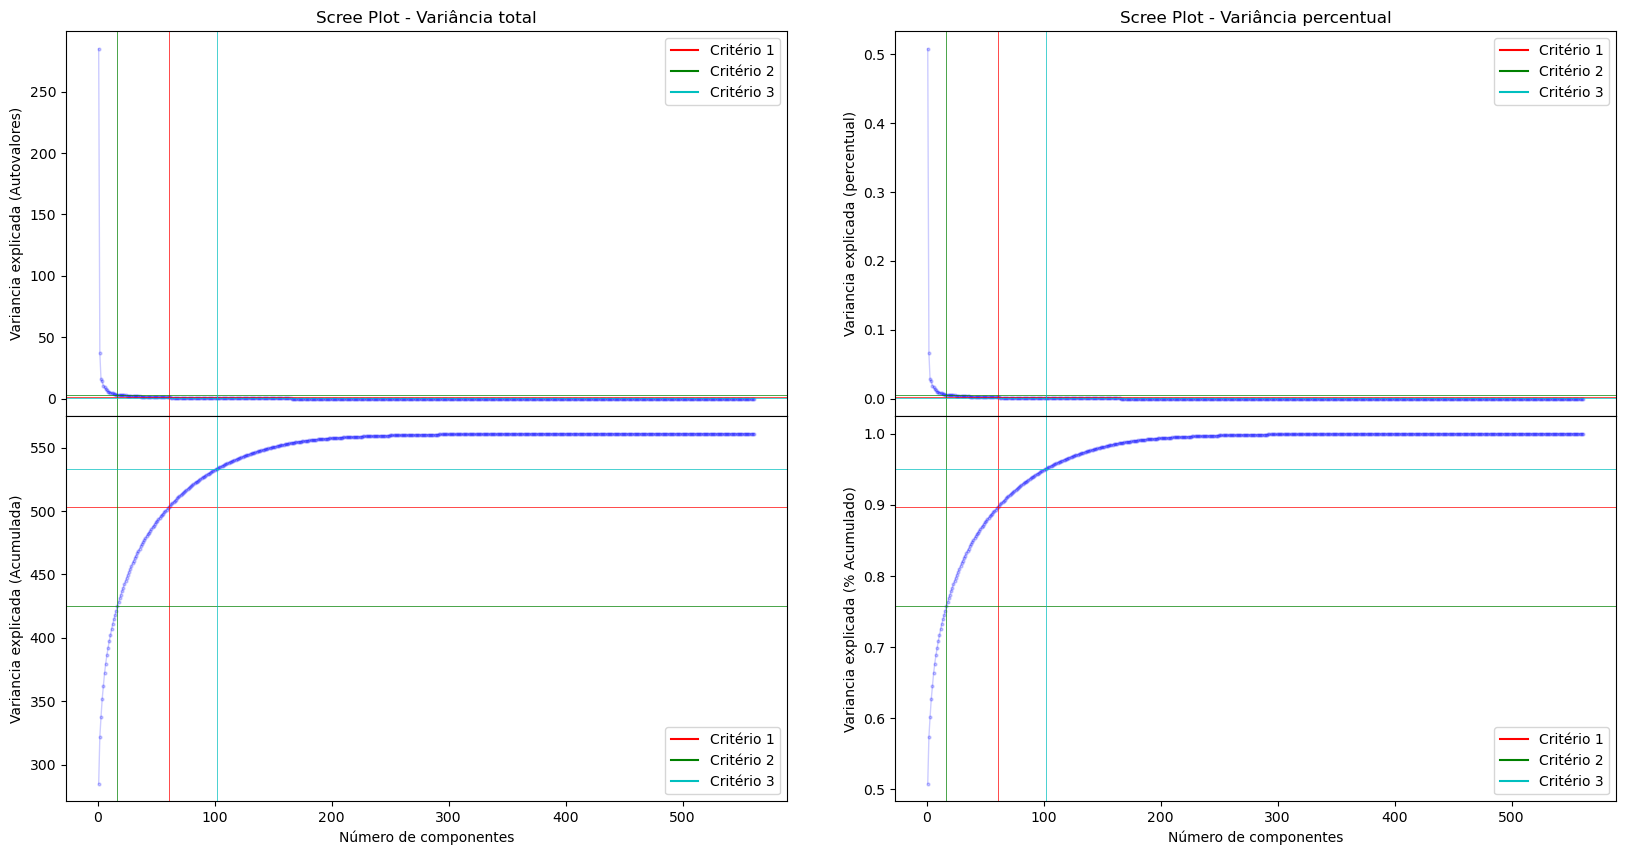

In [12]:
print("Análise PCA Padronizado 2")
graficos(pca_pad)

Observando os gráficos obtidos com os testes anteriores utilizando a base em PCA com padronização dos dados, percebe-se que o valor de variância mais próximo de 90%, é o primeiro critário "autovalor padronizado" com 61 componentes, com valor igual a 89,7%.

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [3]:
%%time  
# Análise de PCA
pca = PCA(n_components = 10).fit(X_train)

pca_tr = pca.transform(X_train)
pca_tt = pca.transform(X_test)

CPU times: total: 93.8 ms
Wall time: 324 ms


In [4]:
# Construindo a árvore
tree = DecisionTreeClassifier(random_state=2360873, min_samples_leaf = 20, ccp_alpha = 0.001).fit(X_train, y_train)

# Treino 
tr_sc = tree.score(X_train, y_train)

# Cálculo de acurácia
tt_sc = tree.score(X_test, y_test)

print(f'Acurácia na base de treino:    {tr_sc*100:.1f}')
print(f'Acurácia na base de teste:     {tt_sc*100:.1f}')

Acurácia na base de treino:    95.8
Acurácia na base de teste:     86.9


In [5]:
%%time  
# Análise de PCA
pca_pad = PCA(n_components = 10).fit(X_train_pad)

pca_tr_pad = pca_pad.transform(X_train_pad)
pca_tt_pad = pca_pad.transform(X_test)

CPU times: total: 328 ms
Wall time: 180 ms


In [8]:
# Construindo a árvore
tree = DecisionTreeClassifier(random_state=2360873, min_samples_leaf = 20, ccp_alpha = 0.001).fit(pca_tr_pad, y_train)

# Treino 
tr_sc = tree.score(pca_tr_pad, y_train)

# Cálculo de acurácia
tt_sc = tree.score(pca_tt_pad, y_test)

print(f'Acurácia na base de treino:    {tr_sc*100:.1f}')
print(f'Acurácia na base de teste:     {tt_sc*100:.1f}')

Acurácia na base de treino:    84.8
Acurácia na base de teste:     20.9


Percebemos que em ambas as árvores, a padronização da base reduziu de forma significativa a acurácia do modelo rodado. 